In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.path as mpath
from matplotlib import ticker
from netCDF4 import Dataset
#Cartopy
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [5]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43651/status,
Dashboard: /proxy/43651/status,Workers: 5
Total threads: 20,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42627,Workers: 5
Dashboard: /proxy/43651/status,Total threads: 20
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:44499,Total threads: 4
Dashboard: /proxy/45079/status,Memory: 25.04 GiB
Nanny: tcp://127.0.0.1:40171,


In [3]:
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

def import_data1d(ncfile=None,variable=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][:]
    fh.close() #Close file
    return data

def import_data2d(ncfile=None,variable=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][0,:,:]
    fh.close() #Close file
    return data

def import_data2d(ncfile=None,variable=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][0,:,:]
    fh.close() #Close file
    return data

def import_data2d_T(ncfile=None,variable=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][:,:]
    fh.close() #Close file
    return data

def import_data2d_TT(ncfile=None,variable=None,tt=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][tt,:,:]
    fh.close() #Close file
    return data

def import_data3d(ncfile=None,variable=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][:,:,:]
    fh.close() #Close file
    return data

def import_data3d_TT(ncfile=None,variable=None,tt=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(False)
    #Get data
    data = fh.variables[str(variable)][tt,:,:,:]
    fh.close() #Close file
    return data

def import_hgrid(ncfile=None):
    fh = Dataset(ncfile, mode='r')
    fh.set_auto_mask(True)
    #Get data
    datalon = fh.variables["geolon_t"][:,:]
    datalat = fh.variables["geolat_t"][:,:]
    fh.close() #Close file
    return datalon,datalat

In [42]:
def plot2d(var=None,level="3446",diff="no"):
    #Data
    fig = plt.figure()
    fs = 10
    root = "/g/data/e14/pc5520/"
    #root = root+"/OUTPUT/acces-om2-01-GPC002/extract/y2150/diffs/"+str(var)+"/"+str(level)+"/"
    #ncfile = root+"cut_ncdiff_avet_cat_avek_k"+str(level)+"_"+str(var)+".nc"
    root = root+"/OUTPUT/acces-om2-01-GPC002/extract/y2150/diffs_vertave/"+str(var)+"/"+str(level)+"/"
    ncfile = root+"avet_avek_ncdiff_rregionocean_daily_3d_k"+str(level)+"_"+str(var)+"_y2150.nc" 
    gridfile = "/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/rregionocean_ocean_grid.nc"
    data_plot = import_data2d(ncfile,var)
    #Import Bathy
    fh = Dataset(gridfile, mode='r')
    fh.set_auto_mask(False)
    bathy = fh.variables["ht"][:,:]
    fh.close() #Close file
    #Axes
    projection = ccrs.PlateCarree(central_longitude=0)
    #projection = ccrs.Orthographic(180,-90)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_facecolor('xkcd:gray')
    #Grid
    lon,lat = import_hgrid(ncfile=gridfile)
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.475, 0.475], 0.475
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform = ax.transAxes)
    ax.set_extent([-180, 180, -78, -55], projection)
    #Plot
    if diff == "yes":
        if var == "salt": vmin,vmax,contourstep,rounds,div=-0.15,0.15,0.01,4,7
        if var == "temp": vmin,vmax,contourstep,rounds,div=-0.75,0.75,0.025,4,7
    else:
        if var == "salt": vmin,vmax,contourstep,rounds,div=34.3,34.8,0.05,4,10
        if var == "temp": vmin,vmax,contourstep,rounds,div=-2,2.8,0.4,4,12
    cmap=cm.seismic
    nb_contours = int(np.ceil((vmax-vmin)/contourstep))
    contours = [round(x , rounds) for x in np.linspace(vmin,vmax,nb_contours+1)]
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    CS = ax.contourf(lon,lat,data_plot,contours,\
                     cmap = cmap,norm=norm,vmin=vmin,vmax=vmax,transform=projection,extend='both')
    cbar = plt.colorbar(CS,ticks=np.linspace(vmin,vmax,div))
    cbar.ax.tick_params(labelsize=fs)
    CSbathy = ax.contour(lon,lat,bathy,[0,1000],colors=['k','k'],transform=projection)
    plt.ylim(ymax=-55,ymin=-78)
    #plt.text(0.46, 1, "Difference of 1 year time average between 300 and 1000m - "+str(var), fontsize = 16, ha = 'center')
    plt.tight_layout()
    #plt.show(block=False)


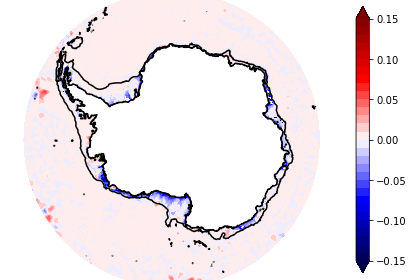

In [44]:
plot2d(var="salt",level="3446",diff="yes")


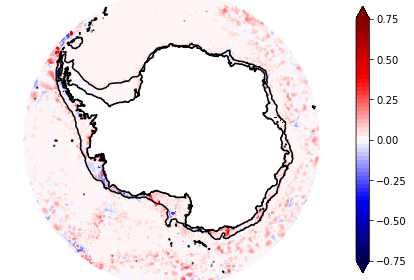

In [45]:
plot2d(var="temp",level="3446",diff="yes")